In [1]:
import os
import pandas as pd
import numpy as np
import re
import statsmodels.api as sm
import finance_byu.rolling as rolling

In [2]:
def convert_ar_characters(input_str):

    mapping = {
        'ك': 'ک',
        'گ':'گ',
        'دِ': 'د',
        'بِ': 'ب',
        'زِ': 'ز',
        'ذِ': 'ذ',
        'شِ': 'ش',
        'سِ': 'س',
        'ى': 'ی',
        'ي': 'ی'
    }
    return _multiple_replace(mapping, input_str)


def _multiple_replace(mapping, text):
    pattern = "|".join(map(re.escape, mapping.keys()))
    return re.sub(pattern, lambda m: mapping[m.group()], str(text))

def vv(row):
    X = row.split('-')
    return int(X[0]+X[1]+X[2])

def vv2(row):
    X = row.split('/')
    return int(X[0]+X[1]+X[2])

In [3]:
path = r"H:\Economics\Finance(Prof.Heidari-Aghajanzadeh)\Data\Capital Rise\\"

In [4]:
df2 = pd.read_csv(path + "adjPrices_1399-11-06.csv")
df2.Date = df2.Date.apply(vv)
df2 = df2.drop(columns = 'Unnamed: 0').rename(columns = {'ID':'stock_id','Date':'date'})

In [5]:
df = pd.read_excel(path  + "Capital Rise - 71-99.xlsx")
df = df[df.CapAfter != df.CapBefore]
df = df[~df.Symbol.isnull()].rename(columns = {'Symbol':'name'})
df = df[['name', 'year', 'Firm', 'CapAfter', 'CapBefore', 'ExtOrdGMDate',
       'Revaluation', 'JustRO', 'JustSaving', 'JustPremium', 'Hybrid',
       '%CapRaised', '%PremiumCapRaising', '%ROCapRaising',
       '%SavingCapRaising']]


df['CapBefore2'] = (df['CapBefore'] / 10).round(0)
df['CapAfter2'] = (df['CapAfter'] / 10).round(0)
df['ExtOrdGMDate2'] = (df['ExtOrdGMDate'] / 10).round(0)

df = df.drop_duplicates(subset=['name','CapAfter2','CapBefore2'],keep = 'first')
df = df.drop_duplicates(subset=['ExtOrdGMDate2','CapBefore2'],keep = 'first')
df = df.drop_duplicates(subset=['ExtOrdGMDate2','CapAfter2'],keep = 'first')
df = df.drop_duplicates(subset=['ExtOrdGMDate','CapBefore2'],keep = 'first')
df = df.drop_duplicates(subset=['ExtOrdGMDate','CapAfter2'],keep = 'first')

df = df[df.CapBefore != 0]
df['Percent'] = ((df['CapAfter'] - df['CapBefore'])/df['CapBefore'] )* 100
df['Percent'] = df['Percent'].round(2)
df = df[df.Percent>0]

df = df[['name', 'year', 'Firm', 'CapAfter', 'CapBefore', 'ExtOrdGMDate',
       'Revaluation', 'JustRO', 'JustSaving', 'JustPremium', 'Hybrid',
       '%CapRaised', '%PremiumCapRaising', '%ROCapRaising',
       '%SavingCapRaising']]
df = df.drop_duplicates(subset=['name','year','CapBefore'],keep = 'first')
df = df.drop_duplicates(subset=['name','year','CapAfter'],keep = 'first')

df = df.drop_duplicates(subset=['ExtOrdGMDate','name'],keep = 'first')


df = df.sort_values(by = ['name','ExtOrdGMDate'])
df = df[['name', 'year', 'Firm', 'CapAfter', 'CapBefore', 'ExtOrdGMDate',
       'Revaluation', 'JustRO', 'JustSaving', 'JustPremium', 'Hybrid',
       '%CapRaised', '%PremiumCapRaising', '%ROCapRaising',
       '%SavingCapRaising']]
df = df[(df.year>1382)&(df.year<1399)]
df.head()

,name,year,Firm,CapAfter,CapBefore,ExtOrdGMDate,Revaluation,JustRO,JustSaving,JustPremium,Hybrid,%CapRaised,%PremiumCapRaising,%ROCapRaising,%SavingCapRaising
0,آ س پ,1388,آ.س.پ,120000.0,60000.0,13881110,0,1,0,0,0,100.000000,0.0,100.0,0.0
1,آ س پ,1389,آ.س.پ,200000.0,120000.0,13891208,0,1,0,0,0,66.666667,0.0,100.0,0.0
3,آ س پ,1393,آ.س.پ,800000.0,200000.0,13930209,0,1,0,0,0,300.000000,0.0,100.0,0.0
5,آ س پ,1397,آ.س.پ,900000.0,800000.0,13970903,0,1,0,0,0,12.500000,0.0,100.0,0.0
7,آ س پ,1398,آ.س.پ,1000000.0,900000.0,13981120,0,1,0,0,0,11.111111,0.0,100.0,0.0


In [6]:
df[df.Revaluation == 1]

,name,year,Firm,CapAfter,CapBefore,ExtOrdGMDate,Revaluation,JustRO,JustSaving,JustPremium,Hybrid,%CapRaised,%PremiumCapRaising,%ROCapRaising,%SavingCapRaising
138,البرز,1392,بیمه البرز,3.600000e+06,600000.00,13920631,1,0,0,0,0,500.000000,0.0,0.000000,100.000000
196,بالبر,1395,کابل البرز,2.280000e+05,114000.00,13950428,1,0,0,0,0,100.000000,0.0,100.000000,0.000000
198,بالبر,1395,کابل البرز,3.169200e+05,228000.00,13951210,1,0,0,0,0,39.000000,0.0,0.000000,100.000000
209,بایکا,1397,کابلسازی ایران,5.047342e+05,37800.00,13971205,1,0,0,0,0,1235.275788,0.0,0.000000,100.000000
492,تمحرکه,1395,ماشین سازی نیرو محرکه,1.218430e+05,32500.00,13950620,1,0,0,0,0,274.901538,0.0,0.000000,100.000000
553,تپکو,1392,هپکو,2.336653e+06,397800.00,13920715,1,0,0,0,0,487.393917,0.0,0.000000,100.000000
555,تپکو,1397,هپکو,2.112189e+07,2336653.00,13971221,1,0,0,0,0,803.937983,0.0,0.000000,100.000000
569,تکشا,1394,خدمات کشاورزی,1.099567e+05,30000.00,13940409,1,0,0,0,0,266.522303,0.0,0.000000,100.000000
587,تکمبا,1393,کمباین سازی,1.723028e+06,519686.00,13930626,1,0,0,0,0,231.551649,0.0,0.000000,100.000000
604,تکنو,1397,تکنوتار,2.455490e+05,160000.00,13971225,1,0,0,0,0,53.468125,0.0,0.000000,100.000000


In [7]:
len(df)

2277

In [8]:
df[df.name == 'وتجارت']

,name,year,Firm,CapAfter,CapBefore,ExtOrdGMDate,Revaluation,JustRO,JustSaving,JustPremium,Hybrid,%CapRaised,%PremiumCapRaising,%ROCapRaising,%SavingCapRaising
4305,وتجارت,1383,بانک تجارت,10437384.0,1231120.0,13830622,0,0,1,0,0,747.795828,0.0,0.000000,100.000000
4307,وتجارت,1389,بانک تجارت,13568599.0,10437384.0,13890503,0,0,0,0,1,29.999998,0.0,76.666661,23.333339
4309,وتجارت,1390,بانک تجارت,17500000.0,13568599.0,13900529,0,0,1,0,0,28.974259,0.0,0.000000,100.000000
4311,وتجارت,1392,بانک تجارت,45700000.0,17500000.0,13921220,1,0,0,0,0,161.142857,0.0,0.000000,100.000000
4313,وتجارت,1397,بانک تجارت,223926127.0,45700000.0,13971228,1,0,0,0,0,389.991525,0.0,0.000000,100.000000


In [9]:
pdf = pd.read_csv( path + 'Stocks_Prices_1399-07-25.csv')
pdf.loc[pdf.name.str[-1] == " ",'name'] = pdf.loc[pdf.name.str[-1] == " "].name.str[:-1]
pdf.loc[pdf.name.str[0] == " ",'name'] = pdf.loc[pdf.name.str[0] == " "].name.str[1:]
pdf['name'] = pdf['name'].apply(lambda x: convert_ar_characters(x))
pdf.jalaliDate = pdf.jalaliDate.apply(vv)
pdf = pdf.sort_values(by =['name','date'])
pdf = pdf[['jalaliDate', 'date', 'name', 'title', 'stock_id',
       'group_name', 'group_id', 'baseVol', 'value', 'volume',
       'quantity']]
pdf = pdf.merge(df2,on = ['stock_id','date'], how = 'left')

# pdf['Firm'] = ''
# pdf.loc[pdf.title.str.contains("\("),'Firm'] = pdf[pdf.title.str.contains("\(")]['title'].str.split("\(", n = 1, expand = True)[0] 
# firmsymbol = pdf[['name','Firm']].drop_duplicates()

In [10]:
gg = pdf.groupby(['name'])
pdf['close'] = gg['close'].fillna(method='ffill')
pdf['High'] = gg['High'].fillna(method='ffill')
pdf['Low'] = gg['Low'].fillna(method='ffill')
pdf['Open'] = gg['Open'].fillna(method='ffill')
pdf['Last'] = gg['Last'].fillna(method='ffill')
pdf.loc[pdf.volume == 0 ,'Volume'] = 0

In [11]:
mdf = pd.DataFrame()
mdf = mdf.append(pdf)

In [12]:
mdf.head().columns

Index(['jalaliDate', 'date', 'name', 'title', 'stock_id', 'group_name',
       'group_id', 'baseVol', 'value', 'volume', 'quantity', 'High', 'Low',
       'Open', 'Last', 'Volume', 'close'],
      dtype='object')

In [13]:
mdf = mdf[mdf.volume != 0]
JalaliDates = list(set(mdf.jalaliDate))
JalaliDates.sort()
t = list(range(len(JalaliDates)))
mapingdict = dict(zip(JalaliDates, t))
mdf['t'] = mdf['jalaliDate'].map(mapingdict)

In [14]:
mapingdict = dict(zip(JalaliDates, t))

df['t'] = df['ExtOrdGMDate'].map(mapingdict)
tIndex = pd.DataFrame(list(mapingdict.keys()), columns=[0])
for i in set(df[df.t.isnull()].ExtOrdGMDate):
    mapingdict[i] = tIndex[tIndex[0] >= i].index[0]
df['t'] = df['ExtOrdGMDate'].map(mapingdict)

In [15]:
df.columns

Index(['name', 'year', 'Firm', 'CapAfter', 'CapBefore', 'ExtOrdGMDate',
       'Revaluation', 'JustRO', 'JustSaving', 'JustPremium', 'Hybrid',
       '%CapRaised', '%PremiumCapRaising', '%ROCapRaising',
       '%SavingCapRaising', 't'],
      dtype='object')

In [16]:
df[df.Revaluation == 1]

,name,year,Firm,CapAfter,CapBefore,ExtOrdGMDate,Revaluation,JustRO,JustSaving,JustPremium,Hybrid,%CapRaised,%PremiumCapRaising,%ROCapRaising,%SavingCapRaising,t
138,البرز,1392,بیمه البرز,3.600000e+06,600000.00,13920631,1,0,0,0,0,500.000000,0.0,0.000000,100.000000,3018
196,بالبر,1395,کابل البرز,2.280000e+05,114000.00,13950428,1,0,0,0,0,100.000000,0.0,100.000000,0.000000,3703
198,بالبر,1395,کابل البرز,3.169200e+05,228000.00,13951210,1,0,0,0,0,39.000000,0.0,0.000000,100.000000,3854
209,بایکا,1397,کابلسازی ایران,5.047342e+05,37800.00,13971205,1,0,0,0,0,1235.275788,0.0,0.000000,100.000000,4331
492,تمحرکه,1395,ماشین سازی نیرو محرکه,1.218430e+05,32500.00,13950620,1,0,0,0,0,274.901538,0.0,0.000000,100.000000,3740
553,تپکو,1392,هپکو,2.336653e+06,397800.00,13920715,1,0,0,0,0,487.393917,0.0,0.000000,100.000000,3029
555,تپکو,1397,هپکو,2.112189e+07,2336653.00,13971221,1,0,0,0,0,803.937983,0.0,0.000000,100.000000,4343
569,تکشا,1394,خدمات کشاورزی,1.099567e+05,30000.00,13940409,1,0,0,0,0,266.522303,0.0,0.000000,100.000000,3447
587,تکمبا,1393,کمباین سازی,1.723028e+06,519686.00,13930626,1,0,0,0,0,231.551649,0.0,0.000000,100.000000,3259
604,تکنو,1397,تکنوتار,2.455490e+05,160000.00,13971225,1,0,0,0,0,53.468125,0.0,0.000000,100.000000,4345


In [17]:
mdf[mdf.name == 'خمهر']

,jalaliDate,date,name,title,stock_id,group_name,group_id,baseVol,value,volume,quantity,High,Low,Open,Last,Volume,close,t
400266,13821220,20040310,خمهر,"مهركام‌پارس‌ (خمهر) - بازار دوم بورس',FaraDesc ='",17330546482145553,خودرو و ساخت قطعات,34,6578947.0,3.947847e+10,6572654,2818,926.0,922.0,922.0,922.0,6572654.0,922.0,720
400267,13821224,20040314,خمهر,"مهركام‌پارس‌ (خمهر) - بازار دوم بورس',FaraDesc ='",17330546482145553,خودرو و ساخت قطعات,34,6578947.0,7.566030e+07,12010,4,968.0,927.0,968.0,927.0,12010.0,927.0,722
400268,13821226,20040316,خمهر,"مهركام‌پارس‌ (خمهر) - بازار دوم بورس',FaraDesc ='",17330546482145553,خودرو و ساخت قطعات,34,6578947.0,2.672032e+09,447058,195,927.0,906.0,924.0,918.0,447058.0,918.0,724
400269,13821227,20040317,خمهر,"مهركام‌پارس‌ (خمهر) - بازار دوم بورس',FaraDesc ='",17330546482145553,خودرو و ساخت قطعات,34,6578947.0,9.393712e+08,157666,75,953.0,905.0,907.0,915.0,157666.0,915.0,725
400270,13830108,20040327,خمهر,"مهركام‌پارس‌ (خمهر) - بازار دوم بورس',FaraDesc ='",17330546482145553,خودرو و ساخت قطعات,34,6578947.0,3.601434e+08,59366,29,953.0,915.0,916.0,924.0,59366.0,924.0,726
400271,13830109,20040328,خمهر,"مهركام‌پارس‌ (خمهر) - بازار دوم بورس',FaraDesc ='",17330546482145553,خودرو و ساخت قطعات,34,6578947.0,1.294484e+09,209923,62,952.0,914.0,924.0,948.0,209923.0,948.0,727
400272,13830110,20040329,خمهر,"مهركام‌پارس‌ (خمهر) - بازار دوم بورس',FaraDesc ='",17330546482145553,خودرو و ساخت قطعات,34,6578947.0,2.160084e+09,348097,98,970.0,937.0,948.0,954.0,348097.0,954.0,728
400273,13830111,20040330,خمهر,"مهركام‌پارس‌ (خمهر) - بازار دوم بورس',FaraDesc ='",17330546482145553,خودرو و ساخت قطعات,34,6578947.0,8.685520e+08,138023,71,973.0,960.0,968.0,967.0,138023.0,967.0,729
400274,13830115,20040403,خمهر,"مهركام‌پارس‌ (خمهر) - بازار دوم بورس',FaraDesc ='",17330546482145553,خودرو و ساخت قطعات,34,6578947.0,9.125317e+08,145223,49,968.0,963.0,967.0,966.0,145223.0,966.0,730
400275,13830116,20040404,خمهر,"مهركام‌پارس‌ (خمهر) - بازار دوم بورس',FaraDesc ='",17330546482145553,خودرو و ساخت قطعات,34,6578947.0,1.420346e+08,22583,11,967.0,962.0,967.0,966.0,22583.0,966.0,731


In [18]:
data = pd.DataFrame()
ndf = pd.DataFrame()
NotCapitalData = []
gg = mdf.groupby('name')
for symbol in list(gg.groups.keys()):
    print(symbol, end="\r", flush=True)
    d = gg.get_group(symbol)
    if len(d)<30:
        continue
    t = df[df.name == symbol]
    if len(t) == 0:
        NotCapitalData.append(symbol)
        continue
    g = pd.DataFrame()
    g = g.append(d)
    g['CapBefore'] = np.nan
    g['CapAfter'] = np.nan
    g['ExtOrdGMDate'] = np.nan
    g['Event'] = np.nan
    g['JustRO'] = np.nan
    g['JustSaving'] = np.nan
    g['JustPremium'] = np.nan
    g['Hybrid'] = np.nan
    g['Revaluation'] = np.nan
    nEvent = 0 
    for date in t.ExtOrdGMDate:
        
        Day = df[(df.name== symbol)&(df.ExtOrdGMDate == date)].ExtOrdGMDate.iloc[0]
        CapBefore = df[(df.name== symbol)&(df.ExtOrdGMDate == date)].CapBefore.iloc[0]
        CapAfter = df[(df.name== symbol)&(df.ExtOrdGMDate == date)].CapAfter.iloc[0]
        JustRO = df[(df.name== symbol)&(df.ExtOrdGMDate == date)].JustRO.iloc[0]
        JustSaving = df[(df.name== symbol)&(df.ExtOrdGMDate == date)].JustSaving.iloc[0]
        JustPremium = df[(df.name== symbol)&(df.ExtOrdGMDate == date)].JustPremium.iloc[0]
        Hybrid = df[(df.name== symbol)&(df.ExtOrdGMDate == date)].Hybrid.iloc[0]
        Revaluation = df[(df.name== symbol)&(df.ExtOrdGMDate == date)].Revaluation.iloc[0]
        mark = 0
#         print(g.jalaliDate.iloc[0],date)
        if (date >= g.jalaliDate.iloc[0] ) and (date < g.jalaliDate.iloc[-1] ):
            nEvent += 1
            mark = 1
            g.loc[g.jalaliDate>=date,'ExtOrdGMDate'] = Day
            g.loc[g.jalaliDate>=date,'CapBefore'] = CapBefore
            g.loc[g.jalaliDate>=date,'CapAfter'] = CapAfter
            g.loc[g.jalaliDate>=date,'Event'] = g.loc[g.jalaliDate>=date].t.iloc[0]
            g.loc[g.jalaliDate>=date,'JustRO'] = JustRO
            g.loc[g.jalaliDate>=date,'JustSaving'] = JustSaving
            g.loc[g.jalaliDate>=date,'JustPremium'] = JustPremium
            g.loc[g.jalaliDate>=date,'Hybrid'] = Hybrid
            g.loc[g.jalaliDate>=date,'Revaluation'] = Revaluation 
            if nEvent ==1:
                g.loc[g.jalaliDate<date,'ExtOrdGMDate'] = Day
                g.loc[g.jalaliDate<date,'CapBefore'] = CapBefore
                g.loc[g.jalaliDate<date,'CapAfter'] = CapAfter
                g.loc[g.jalaliDate<date,'Event'] = g.loc[g.jalaliDate>=date].t.iloc[0]
                g.loc[g.jalaliDate<date,'JustRO'] = JustRO
                g.loc[g.jalaliDate<date,'JustSaving'] = JustSaving
                g.loc[g.jalaliDate<date,'JustPremium'] = JustPremium
                g.loc[g.jalaliDate<date,'Hybrid'] = Hybrid
                g.loc[g.jalaliDate<date,'Revaluation'] = Revaluation 
                
        if mark == 1:
            ndf = ndf.append(df[(df.name== symbol)&(df.ExtOrdGMDate == date)])
    if mark == 1:
        data = data.append(g)

In [19]:
ndf

,name,year,Firm,CapAfter,CapBefore,ExtOrdGMDate,Revaluation,JustRO,JustSaving,JustPremium,Hybrid,%CapRaised,%PremiumCapRaising,%ROCapRaising,%SavingCapRaising,t
3,آ س پ,1393,آ.س.پ,800000.0,200000.0,13930209,0,1,0,0,0,300.000000,0.0,100.000000,0.000000,3164
5,آ س پ,1397,آ.س.پ,900000.0,800000.0,13970903,0,1,0,0,0,12.500000,0.0,100.000000,0.000000,4268
7,آ س پ,1398,آ.س.پ,1000000.0,900000.0,13981120,0,1,0,0,0,11.111111,0.0,100.000000,0.000000,4560
22,آرمان,1396,بیمه آرمان,1500000.0,1200000.0,13961228,0,0,0,0,1,25.000000,0.0,79.481667,20.518333,4107
28,آریان,1391,سرمایه گذاری پارس آریان,9190800.0,8280000.0,13911222,0,1,0,0,0,11.000000,0.0,100.000000,0.000000,2893
30,آریان,1392,سرمایه گذاری پارس آریان,11500000.0,9190800.0,13921108,0,0,0,0,1,25.125125,0.0,99.501992,0.498008,3105
32,آریان,1394,سرمایه گذاری پارس آریان,14375000.0,11500000.0,13940116,0,1,0,0,0,25.000000,0.0,100.000000,0.000000,3388
34,آریان,1394,سرمایه گذاری پارس آریان,17537500.0,14375000.0,13940922,0,1,0,0,0,22.000000,0.0,100.000000,0.000000,3558
36,آریان,1395,سرمایه گذاری پارس آریان,19817375.0,17537500.0,13950909,0,1,0,0,0,13.000000,0.0,100.000000,0.000000,3792
39,آسیا,1392,بیمه آسیا,2300000.0,455000.0,13920120,0,0,1,0,0,405.494505,0.0,0.000000,100.000000,2907


In [20]:
ndf.to_excel(path + 'SDate.xlsx',index = False)

In [21]:
# 
data2 = data.sort_values(by = ['name','t'],ascending = False).reset_index(drop = True)
gg = data2.groupby('name')
data2['Event'] = gg['Event'].fillna(method='ffill')

In [22]:
data = data2.sort_values(by = ['name','t'])
# data['Period'] = data['t'] - data['Event']

In [23]:

index = pd.read_excel(path + 'IRX6XTPI0009.xls')[['<COL14>','<CLOSE>']].rename(columns = {'<COL14>':'jalaliDate','<CLOSE>':'Index'})
index['Market_return'] =  index['Index'].pct_change(periods = 1)*100
# index = DriveYearMonthDay(index)
pdf.jalaliDate = pdf.jalaliDate.astype(int)
index = index[index.jalaliDate >= pdf.jalaliDate.min()] 
n = path +  'RiskFree.xlsx'
rf = pd.read_excel(n)
rf = rf.rename(columns = {'Unnamed: 2' : 'Year'})
rf['YM'] = rf['YM'].astype(str)
rf['YM'] = rf['YM'] + '00'
rf['YM'] = rf['YM'].astype(int)
index['RiskFree'] = np.nan
index['jalaliDate'] = index['jalaliDate'].astype(int)
for i in rf.YM:
    index.loc[index.jalaliDate>= i,'RiskFree'] = rf.loc[rf['YM'] == i ].iloc[0,1]/356

In [24]:
data = data.merge(index,on = "jalaliDate")

In [25]:
data = data.rename(columns = {'close':'close_price'})

In [26]:
data = data.sort_values(by = ['name','t']).reset_index(drop = True)
data = data[~data.High.isnull()]
data = data[~data.Market_return.isnull()]

In [27]:
data.columns

Index(['jalaliDate', 'date', 'name', 'title', 'stock_id', 'group_name',
       'group_id', 'baseVol', 'value', 'volume', 'quantity', 'High', 'Low',
       'Open', 'Last', 'Volume', 'close_price', 't', 'CapBefore', 'CapAfter',
       'ExtOrdGMDate', 'Event', 'JustRO', 'JustSaving', 'JustPremium',
       'Hybrid', 'Revaluation', 'Index', 'Market_return', 'RiskFree'],
      dtype='object')

In [28]:
data.isnull().sum().to_frame()

,0
jalaliDate,0
date,0
name,0
title,0
stock_id,0
group_name,0
group_id,0
baseVol,0
value,0
volume,0


In [29]:
data

,jalaliDate,date,name,title,stock_id,group_name,group_id,baseVol,value,volume,...,ExtOrdGMDate,Event,JustRO,JustSaving,JustPremium,Hybrid,Revaluation,Index,Market_return,RiskFree
0,13900422,20110713,آ س پ,"آ.س.پ (آ س پ) - بازار اول فرابورس',FaraDesc ='",17617474823279712,انبوه سازي، املاك و مستغلات,70,3691672.0,6.199070e+10,19997000,...,13930209.0,3183.0,1.0,0.0,0.0,0.0,0.0,24286.7,-0.411693,0.047753
1,13900425,20110716,آ س پ,"آ.س.پ (آ س پ) - بازار اول فرابورس',FaraDesc ='",17617474823279712,انبوه سازي، املاك و مستغلات,70,3691672.0,2.488219e+10,7652278,...,13930209.0,3183.0,1.0,0.0,0.0,0.0,0.0,24348.9,0.256107,0.047753
2,13900427,20110718,آ س پ,"آ.س.پ (آ س پ) - بازار اول فرابورس',FaraDesc ='",17617474823279712,انبوه سازي، املاك و مستغلات,70,3691672.0,2.288039e+10,7009102,...,13930209.0,3183.0,1.0,0.0,0.0,0.0,0.0,24460.7,0.459158,0.047753
3,13900428,20110719,آ س پ,"آ.س.پ (آ س پ) - بازار اول فرابورس',FaraDesc ='",17617474823279712,انبوه سازي، املاك و مستغلات,70,3691672.0,6.528187e+09,2038452,...,13930209.0,3183.0,1.0,0.0,0.0,0.0,0.0,24494.6,0.138590,0.047753
4,13900429,20110720,آ س پ,"آ.س.پ (آ س پ) - بازار اول فرابورس',FaraDesc ='",17617474823279712,انبوه سازي، املاك و مستغلات,70,3691672.0,3.170384e+09,1007426,...,13930209.0,3183.0,1.0,0.0,0.0,0.0,0.0,24602.0,0.438464,0.047753
5,13900501,20110723,آ س پ,"آ.س.پ (آ س پ) - بازار اول فرابورس',FaraDesc ='",17617474823279712,انبوه سازي، املاك و مستغلات,70,3691672.0,6.436455e+09,2035163,...,13930209.0,3183.0,1.0,0.0,0.0,0.0,0.0,24809.6,0.843834,0.047753
6,13900502,20110724,آ س پ,"آ.س.پ (آ س پ) - بازار اول فرابورس',FaraDesc ='",17617474823279712,انبوه سازي، املاك و مستغلات,70,3691672.0,2.385880e+09,766713,...,13930209.0,3183.0,1.0,0.0,0.0,0.0,0.0,25181.7,1.499823,0.047753
7,13900503,20110725,آ س پ,"آ.س.پ (آ س پ) - بازار اول فرابورس',FaraDesc ='",17617474823279712,انبوه سازي، املاك و مستغلات,70,3691672.0,4.607951e+09,1538626,...,13930209.0,3183.0,1.0,0.0,0.0,0.0,0.0,25325.4,0.570652,0.047753
8,13900504,20110726,آ س پ,"آ.س.پ (آ س پ) - بازار اول فرابورس',FaraDesc ='",17617474823279712,انبوه سازي، املاك و مستغلات,70,3691672.0,2.503645e+09,823545,...,13930209.0,3183.0,1.0,0.0,0.0,0.0,0.0,25434.6,0.431188,0.047753
9,13900505,20110727,آ س پ,"آ.س.پ (آ س پ) - بازار اول فرابورس',FaraDesc ='",17617474823279712,انبوه سازي، املاك و مستغلات,70,3691672.0,1.452172e+09,476305,...,13930209.0,3183.0,1.0,0.0,0.0,0.0,0.0,25471.8,0.146257,0.047753


In [30]:
#     gg = ARdata.groupby('name')
#     g = gg.get_group('آریان')
#     a = pd.DataFrame()
#     a = a.append(g)
#     a = a[~a.ER.isnull()]
#     a = a.reset_index(drop = True).reset_index().rename(columns = {'index':'Period'})
#     a['Period'] = a['Period'].astype(int)
#     a['AbnormalReturn'] = np.nan
#     a['EPeriod'] = np.nan
#     j=0
#     for i in a[a.Event == a.t]['Period']:
#         j += 1
#         lag = 90
#         tempt = pd.DataFrame()
#         tempt = a.loc[(a.Period>=(i-lag))&(a.Period<=(i+lag))]
#         a.loc[(a.Period>=(i-lag))&(a.Period<=(i+lag)),'EPeriod'] = tempt['Period'] - i
#         y ,x = 'ER', 'EMR'
        
#         model = sm.OLS(tempt[y], sm.add_constant(tempt[x])).fit()
#         beta = model.params[1]
#         alpha = model.params[0]
            
#         a.loc[(a.Period>=(i-lag))&(a.Period<=(i+lag)),'AbnormalReturn'] = tempt['Return'] - (tempt['RiskFree'] + alpha + beta * tempt['EMR'])   

In [31]:
# def FFJR(g,lag):
#     print(g.name, end="\r", flush=True)
#     a = pd.DataFrame()
#     a = a.append(g)
#     a = a[~a.ER.isnull()]
#     a = a.reset_index(drop = True).reset_index().rename(columns = {'index':'Period'})
#     a['Period'] = a['Period'].astype(int)
#     a['FFJRAbnormalReturn'] = np.nan
#     a['EPeriod'] = np.nan
#     a['nEvent'] = np.nan
#     nEvent = 0
#     for i in a[a.Event == a.t]['Period']:
#         nEvent += 1
#         tempt = pd.DataFrame()
#         tempt = a.loc[(a.Period>=(i-lag))&(a.Period<=(i+lag))]
#         a.loc[(a.Period>=(i-lag))&(a.Period<=(i+lag)),'EPeriod'] = tempt['Period'] - i
#         a.loc[(a.Period>=(i-lag))&(a.Period<=(i+lag)),'nEvent'] = nEvent
#         alpha,beta = ols(tempt)
            
#         a.loc[(a.Period>=(i-lag))&
#               (a.Period<=(i+lag)),
#               'FFJRAbnormalReturn'] = tempt['Return'] - (tempt['RiskFree'] + alpha + beta * tempt['EMR'])     
        
#     return a[(~a['EPeriod'].isnull())]
    
    
# def ols(tempt):
#     y ,x = 'ER', 'EMR'
#     model = sm.OLS(tempt[y], sm.add_constant(tempt[x])).fit()
#     beta = model.params[1]
#     alpha = model.params[0]
#     return alpha,beta


# ARdata = pd.DataFrame()
# ARdata = ARdata.append(data)
# ARdata['Return'] = ARdata.groupby('name')['close_price'].pct_change(periods = 1)*100
# ARdata['ER']= ARdata['Return'] - ARdata['RiskFree']
# ARdata['EMR']= ARdata['Market_return'] - ARdata['RiskFree']
# gg = ARdata.groupby('name')
# ARdata = gg.apply(FFJR , lag = 90).reset_index(drop = True)
# ARdata = ARdata.sort_values(by = ['name','t'])
# ARdata.isnull().sum()


# Data = pd.DataFrame()
# Data = Data.append(ARdata)
# Data = Data.reset_index(drop = True)
# Data = Data.rename(columns = {'ER':'EReturn'})
# Data['Amihud'] = abs(Data["Return"])/Data["Volume"]

In [32]:
# FFJData = pd.DataFrame()
# FFJData = FFJData.append(Data)

In [33]:
# gg = FFJData.groupby(['name','nEvent'])
# FFJData['CAR'] = gg['FFJRAbnormalReturn'].cumsum()

In [34]:
# t = pd.DataFrame()
# vv = FFJData.groupby('EPeriod')['CAR'].mean().to_frame().rename(columns = {'CAR':'CAAR'}).reset_index()
# vv.plot(x= 'EPeriod',y='CAAR' )
# t['FFJ_CAAR'] = vv['CAAR']

# vv = FFJData[FFJData.Revaluation == 1].groupby('EPeriod')['CAR'].mean().to_frame().rename(columns = {'CAR':'CAAR'}).reset_index()
# vv.plot(x= 'EPeriod',y='CAAR' )
# t['FFJ_CAAR_Revaluation'] = vv['CAAR']

# vv = FFJData[FFJData.JustRO == 1].groupby('EPeriod')['CAR'].mean().to_frame().rename(columns = {'CAR':'CAAR'}).reset_index()
# vv.plot(x= 'EPeriod',y='CAAR' )
# t['FFJ_CAAR_Cash'] = vv['CAAR']

# vv = FFJData[FFJData.Hybrid == 1].groupby('EPeriod')['CAR'].mean().to_frame().rename(columns = {'CAR':'CAAR'}).reset_index()
# vv.plot(x= 'EPeriod',y='CAAR' )
# t['FFJ_CAAR_Hybrid'] = vv['CAAR']

# vv = FFJData[FFJData.JustSaving == 1].groupby('EPeriod')['CAR'].mean().to_frame().rename(columns = {'CAR':'CAAR'}).reset_index()
# vv.plot(x= 'EPeriod',y='CAAR' )
# t['FFJ_CAAR_Saving'] = vv['CAAR']
# t['EPeriod'] = vv['EPeriod']

# vv = FFJData.groupby('EPeriod')['CAR'].quantile(0.95).to_frame().rename(columns = {'CAR':'CAAR'}).reset_index()
# vv.plot(x= 'EPeriod',y='CAAR' )
# t['FFJ_CAAR_95'] = vv['CAAR']

# vv = FFJData.groupby('EPeriod')['CAR'].quantile(0.05).to_frame().rename(columns = {'CAR':'CAAR'}).reset_index()
# vv.plot(x= 'EPeriod',y='CAAR' )
# t['FFJ_CAAR_05'] = vv['CAAR']





# vv = FFJData.groupby('EPeriod')['CAR'].std().to_frame().reset_index().rename(columns = {'CAR':'std'})
# t = t.merge(vv,on = ['EPeriod'])
# vv = FFJData.groupby('EPeriod')['CAR'].count().to_frame().reset_index().rename(columns = {'CAR':'N'})
# t = t.merge(vv,on = ['EPeriod'])

In [205]:
def ABnormal(g , Rlag):
    lag = 120 + Rlag
    print(g.name , end = "\r",flush = True)
    a = pd.DataFrame()
    a = a.append(g)
    a = a[~a.ER.isnull()]
    a = a.reset_index(drop = True).reset_index().rename(columns = {'index':'Period'})
    a['Period'] = a['Period'].astype(int)
    a['AbnormalReturn'] = np.nan
    a['EPeriod'] = np.nan
    a['nEvent'] = np.nan
    nEvent = 0
    for i in a[a.Event == a.t]['Period']:
        nEvent += 1 
        tempt = pd.DataFrame()
        tempt = a.loc[(a.Period>=(i-lag))&(a.Period<=(i+lag))]
        a.loc[(a.Period>=(i-lag))&(a.Period<=(i+lag)),'EPeriod'] = tempt['Period'] - i
        a.loc[(a.Period>=(i-lag))&(a.Period<=(i+lag)),'nEvent'] = nEvent
        
        a.loc[(a.Period>=(i-lag))&(a.Period<=(i+lag)),'JustRO'] = a[a.Period == i]['JustRO'].iloc[0]
        a.loc[(a.Period>=(i-lag))&(a.Period<=(i+lag)),'JustSaving'] = a[a.Period == i]['JustSaving'].iloc[0]
        a.loc[(a.Period>=(i-lag))&(a.Period<=(i+lag)),'JustPremium'] = a[a.Period == i]['JustPremium'].iloc[0]
        a.loc[(a.Period>=(i-lag))&(a.Period<=(i+lag)),'Hybrid'] = a[a.Period == i]['Hybrid'].iloc[0]
        a.loc[(a.Period>=(i-lag))&(a.Period<=(i+lag)),'Revaluation'] = a[a.Period == i]['Revaluation'].iloc[0]
        
        
        if len(a.loc[a.EPeriod < -1*Rlag])<30:
            continue
        
        alpha , beta = ols(a.loc[a.EPeriod < -1*Rlag])
            
        a.loc[(a.Period>=(i-lag))&
              (a.Period<=(i+lag)),
              'AbnormalReturn'] = tempt['Return'] - (tempt['RiskFree'] + alpha + beta * tempt['EMR'])   
          
        
    return a[(~a['EPeriod'].isnull())]

    
def ols(tempt):
    y ,x = 'ER', 'EMR'
    model = sm.OLS(tempt[y], sm.add_constant(tempt[x])).fit()
    beta = model.params[1]
    alpha = model.params[0]
    return alpha , beta


ARdata = pd.DataFrame()
ARdata = ARdata.append(data)
ARdata['Return'] = ARdata.groupby('name')['close_price'].pct_change(periods = 1)*100
ARdata['ER']= ARdata['Return'] - ARdata['RiskFree']
ARdata['EMR']= ARdata['Market_return'] - ARdata['RiskFree']
gg = ARdata.groupby('name')


## Lag 

ARdata = gg.apply(ABnormal,Rlag =5).reset_index(drop = True)

##
ARdata = ARdata.sort_values(by = ['name','t'])
ARdata.isnull().sum()

Data = pd.DataFrame()
Data = Data.append(ARdata)
Data = Data.reset_index(drop = True)
Data = Data.rename(columns = {'ER':'EReturn'})
Data['Amihud'] = abs(Data["Return"])/Data["Volume"]

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [206]:
t1 = pd.DataFrame()
Data = Data.loc[(Data.EPeriod>=-20)&(Data.EPeriod<=80)]


gg = Data.groupby(['name','nEvent'])
Data['CAR'] = gg['AbnormalReturn'].cumsum()
Data['RaiseType'] = np.nan
Data.loc[Data.JustRO == 1,'RaiseType'] = 'JustRO'
Data.loc[Data.JustSaving == 1,'RaiseType'] = 'JustSaving'
Data.loc[Data.JustPremium == 1,'RaiseType'] = 'JustPremium'
Data.loc[Data.Hybrid == 1,'RaiseType'] = 'Hybrid'
Data.loc[Data.Revaluation == 1,'RaiseType'] = 'Revaluation'

def Result(g):
    AAR = g.groupby('EPeriod').AbnormalReturn.mean().to_frame().rename(columns = {'AbnormalReturn':'AAR'})
    AAR['CAAR'] = g.groupby('EPeriod').CAR.mean()
    AAR['CAAR_05'] = g.groupby('EPeriod').CAR.quantile(0.05)
    AAR['CAAR_95'] = g.groupby('EPeriod').CAR.quantile(0.95)
    AAR['Size'] = g.groupby('EPeriod').size()
    
    g = g.merge(AAR.reset_index(), on = 'EPeriod').sort_values(by =['name','date'])
    g['std'] = (g['CAR'] - g['CAAR']) * (g['CAR'] - g['CAAR'])/(g['Size'] - 1)
    AAR['std'] = (g.groupby('EPeriod')['std'].sum())**0.5
    AAR['t'] = AAR['Size']**0.5 * AAR['CAAR'] / AAR['std']
    return AAR

gg = Data.groupby('RaiseType')
t1 = gg.apply(Result)
t = Result(Data).reset_index()
t['RaiseType'] = 'Total'
t1 = t1.reset_index()
t1 = t1.append(t).reset_index( drop = True)
t1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,AAR,CAAR,CAAR_05,CAAR_95,EPeriod,RaiseType,Size,std,t
0,0.513994,0.513994,-3.856753,3.631981,-20.0,Hybrid,137,9.261049,0.649619
1,-0.080079,0.433916,-5.494568,6.045917,-19.0,Hybrid,137,9.572996,0.530539
2,0.048984,0.482899,-6.892422,6.354646,-18.0,Hybrid,138,10.152136,0.558777
3,0.283375,0.766274,-7.816368,9.073125,-17.0,Hybrid,138,10.609379,0.848465
4,-0.211991,0.554284,-9.641210,10.603541,-16.0,Hybrid,138,11.130989,0.584976
5,-0.099966,0.459266,-10.786054,14.406926,-15.0,Hybrid,137,11.858529,0.453308
6,-0.212125,0.247141,-12.774187,13.937431,-14.0,Hybrid,138,12.207733,0.237821
7,-0.129014,0.118128,-12.326708,13.550594,-13.0,Hybrid,138,12.751753,0.108823
8,-0.065229,0.052898,-13.823752,14.977214,-12.0,Hybrid,138,13.156188,0.047234
9,-0.333988,-0.256322,-15.263693,16.649989,-11.0,Hybrid,137,13.881638,-0.216125


In [207]:
import seaborn as sns
from matplotlib import pyplot as plt


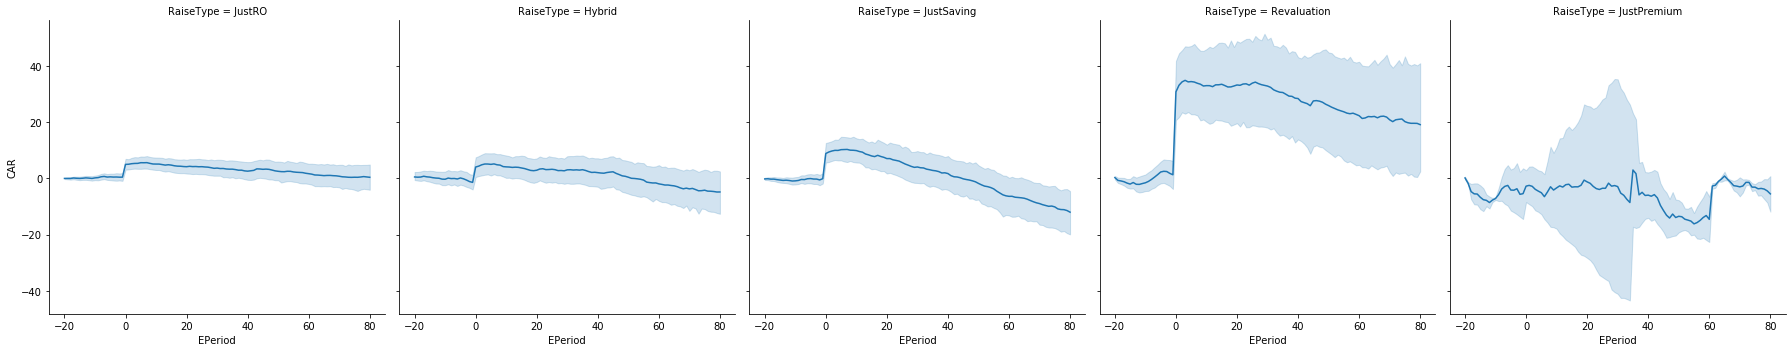

In [208]:
g = sns.relplot(
    data= Data, kind="line",
    x="EPeriod", y="CAR", col="RaiseType")

In [209]:
t1[t1.EPeriod == 0]

,AAR,CAAR,CAAR_05,CAAR_95,EPeriod,RaiseType,Size,std,t
20,5.458810,4.047142,-23.830709,35.847839,0.0,Hybrid,141,20.642984,2.328013
121,2.675057,-2.751376,-7.832780,2.330027,0.0,JustPremium,3,5.646004,-0.844052
222,4.534776,4.982995,-19.545658,41.421807,0.0,JustRO,538,21.134211,5.468844
323,8.950135,8.848539,-23.699254,55.152234,0.0,JustSaving,282,29.066718,5.112109
424,29.471927,30.766572,-20.425936,106.492359,0.0,Revaluation,62,42.337173,5.722069
525,7.385654,7.468069,-20.610324,52.317203,0.0,Total,1026,25.840105,9.257372


In [183]:
n1 = path + 'CAAR.xlsx'
n = path + 'FFJ_CAAR.xlsx'

In [184]:
# t.to_excel(n,index = False)
t1.to_excel(n1,index = False)

In [150]:
# ARdata = pd.DataFrame()
# ARdata = ARdata.append(data)
# ARdata['Return'] = ARdata.groupby('name')['close_price'].pct_change(periods = 1)*100
# ARdata['ER']= ARdata['Return'] - ARdata['RiskFree']
# ARdata['EMR']= ARdata['Market_return'] - ARdata['RiskFree']
# # def AR(g):
# #     print(g.name)
# #     for i in range(len(g)):
# #         try:
# #             tdf = pd.DataFrame()
# #             tdf = tdf.append(g.iloc[i-60:i,::])
# #             tdf['ER']= tdf['Return'] - tdf['RiskFree']
# #             tdf['EMR']= tdf['Market_return'] - tdf['RiskFree']
# #             y ,x = 'ER', 'EMR'
# #             model = sm.OLS(tdf[y], sm.add_constant(tdf[x])).fit()
# #             beta = model.params[1]
# #             alpha = model.params[0]
# #             t = g.iloc[i,:]
            
# #             g.iloc[i,-1] = (t['Return'] ) - beta*(t['Market_return']) -alpha
# #         except:
# #             False
# #     return g


# ARdata['AbnormalReturn'] = ARdata.groupby('name')[['ER','EMR']].apply(lambda x: rolling.roll_beta(x['ER'],x['EMR'],60,5,ddof=1))
# gg = ARdata.groupby('name')
# ARdata['AbnormalReturn'] = gg['AbnormalReturn'].shift(1)
# ARdata['AbnormalReturn'] = ARdata['Return'] - (ARdata['RiskFree'] + ARdata['AbnormalReturn']*ARdata['EMR'] )
# # ARdata = gg.apply(AR)

In [151]:
# n = path + "ARDateCapitalRise.csv"
# ARdata.to_csv(n,index = False)
# # ARdata = pd.read_csv(n)

Index(['Period', 'jalaliDate', 'date', 'name', 'title', 'stock_id',
       'group_name', 'group_id', 'baseVol', 'value', 'volume', 'quantity',
       'High', 'Low', 'Open', 'Last', 'Volume', 'close_price', 't',
       'CapBefore', 'CapAfter', 'ExtOrdGMDate', 'Event', 'JustRO',
       'JustSaving', 'JustPremium', 'Hybrid', 'Revaluation', 'Index',
       'Market_return', 'RiskFree', 'Return', 'EReturn', 'EMR',
       'FFJRAbnormalReturn', 'EPeriod', 'AbnormalReturn', 'Amihud'],
      dtype='object')

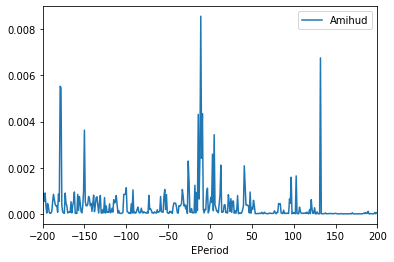

In [161]:
vv = Data.groupby('EPeriod')['Amihud'].mean().to_frame().reset_index()
vv.plot(x= 'EPeriod',y='Amihud' )

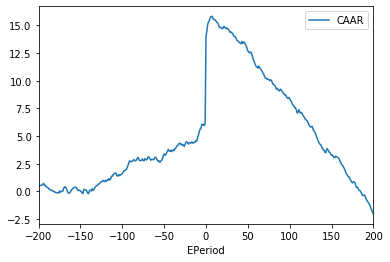

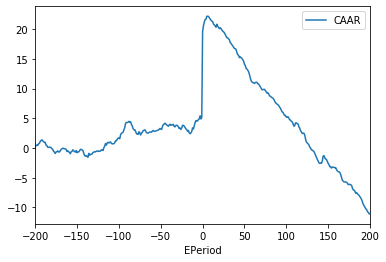

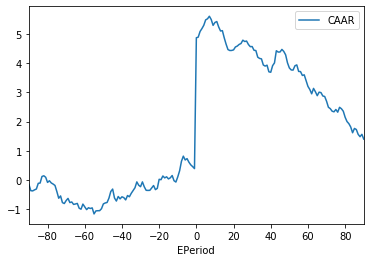

In [156]:
vv = Data[Data.JustRO == 1].groupby('EPeriod')['AbnormalReturn'].mean().to_frame().rename(columns = {'AbnormalReturn':'AAR'}).reset_index()
vv['CAAR'] = vv['AAR'].cumsum()
vv.plot(x= 'EPeriod',y='CAAR' )

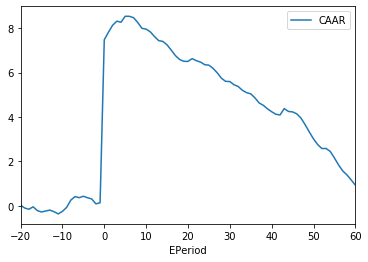

In [138]:
vv = Data.groupby('EPeriod')['AbnormalReturn2'].mean().to_frame().rename(columns = {'AbnormalReturn2':'AAR'}).reset_index()
vv = vv[(vv.EPeriod >= -20)&(vv.EPeriod<=60)]
vv['CAAR'] = vv['AAR'].cumsum()
vv.plot(x= 'EPeriod',y='CAAR' )

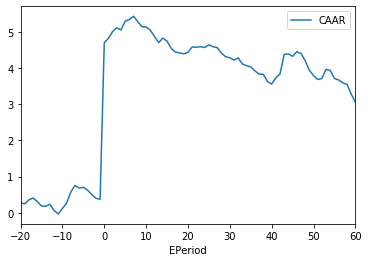

In [142]:
vv = Data[Data.JustRO == 1].groupby('EPeriod')['AbnormalReturn2'].mean().to_frame().rename(columns = {'AbnormalReturn2':'AAR'}).reset_index()
vv = vv[(vv.EPeriod >= -20)&(vv.EPeriod<=60)]
vv['CAAR'] = vv['AAR'].cumsum()
vv.plot(x= 'EPeriod',y='CAAR' )

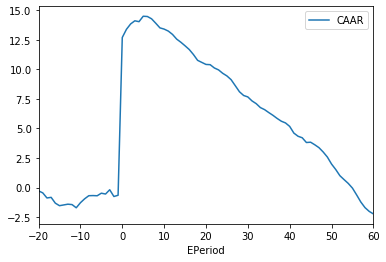

In [139]:
vv = Data[Data.Revaluation == 1].groupby('EPeriod')['AbnormalReturn2'].mean().to_frame().rename(columns = {'AbnormalReturn2':'AAR'}).reset_index()
vv = vv[(vv.EPeriod >= -20)&(vv.EPeriod<=60)]
vv['CAAR'] = vv['AAR'].cumsum()
vv.plot(x= 'EPeriod',y='CAAR' )

In [47]:
# ret = list(range(90))
# for i in ret:
#     print(i+1)
#     p = i+1
#     gg = Data.groupby(['name'])
#     name1 = 'Ret_' + str(p)
    
#     Data[name1] =  gg['close_price'].pct_change(periods = p)*100
#     gg = Data.groupby(['name'])
#     Data[name1] = gg[name1] .shift(-(p-1))
    
#     print("Return Done")
#     gg = Data.groupby(['name'])
#     Data['E'+name1] = gg['EReturn'].rolling(p).sum().to_frame().reset_index(drop = True)
    
#     gg = Data.groupby(['name'])
#     Data['E'+name1] = gg['E'+name1] .shift(-(p-1))
    
#     print("EReturn Done")
    
#     gg = Data.groupby(['name'])
#     Data['Ab'+name1] = gg["AbnormalReturn"].rolling(p).sum().to_frame().reset_index(drop = True)
    
#     gg = Data.groupby(['name'])
#     Data['Ab'+name1] = gg['Ab'+name1].shift(-(p-1))
    
#     print("AbReturn Done")
    
    
#     gg = Data.groupby(['name'])
#     Data["P" + 'Ab'+name1] = gg['Ab'+name1].shift((p))
    
#     gg = Data.groupby(['name'])
#     Data["P" + 'E'+name1] = gg['E'+name1].shift((p))
    
#     gg = Data.groupby(['name'])
#     Data["P" +name1] = gg[name1].shift((p))
    
#     print("Amihud")
#     gg = Data.groupby('name')
#     Data['P'+ str(p)+'Amihud'] = gg['Amihud'].shift(p)
#     Data['F'+ str(p)+'Amihud'] = gg['Amihud'].shift(-p)


In [40]:
Data.head()

,Period,jalaliDate,date,name,title,stock_id,group_name,group_id,baseVol,value,...,P89Amihud,F89Amihud,Ret_90,ERet_90,AbRet_90,PAbRet_90,PERet_90,PRet_90,P90Amihud,F90Amihud
0,539,13920911,20131202,آ س پ,"آ.س.پ (آ س پ) - بازار اول فرابورس',FaraDesc ='",17617474823279712,انبوه سازي، املاك و مستغلات,70,3691672.0,1.408737e+09,...,NaN,1.073241e-06,NaN,3.418821,12.492405,NaN,NaN,NaN,NaN,1.752242e-06
1,540,13920912,20131203,آ س پ,"آ.س.پ (آ س پ) - بازار اول فرابورس',FaraDesc ='",17617474823279712,انبوه سازي، املاك و مستغلات,70,3691672.0,1.123682e+10,...,NaN,1.752242e-06,14.904246,16.225353,23.902045,NaN,NaN,NaN,NaN,6.796614e-07
2,541,13920913,20131204,آ س پ,"آ.س.پ (آ س پ) - بازار اول فرابورس',FaraDesc ='",17617474823279712,انبوه سازي، املاك و مستغلات,70,3691672.0,5.500420e+09,...,NaN,6.796614e-07,6.847134,8.878167,17.943353,NaN,NaN,NaN,NaN,4.417247e-06
3,542,13920916,20131207,آ س پ,"آ.س.پ (آ س پ) - بازار اول فرابورس',FaraDesc ='",17617474823279712,انبوه سازي، املاك و مستغلات,70,3691672.0,8.491075e+09,...,NaN,4.417247e-06,-0.539707,1.724977,15.546610,NaN,NaN,NaN,NaN,2.901685e-07
4,543,13920917,20131208,آ س پ,"آ.س.پ (آ س پ) - بازار اول فرابورس',FaraDesc ='",17617474823279712,انبوه سازي، املاك و مستغلات,70,3691672.0,6.297749e+09,...,NaN,2.901685e-07,3.858521,5.952324,20.443240,NaN,NaN,NaN,NaN,1.904203e-06


In [45]:
Data.to_csv(path + "Data.csv",index = False)
# Data = pd.read_csv(path + "Data.csv")

In [41]:
pAb = ["P"  + str(i+1) + "Amihud" for i in range(90) ]
Ab = ["F"  + str(i+1) + "Amihud" for i in range(90) ]
t1 = Data[Data.EPeriod == 0][pAb].mean().to_frame().rename(index=lambda s: -1 * int(s[1:-6]) )
t2 = Data[Data.EPeriod == 0][Ab].mean().to_frame().rename(index=lambda s: int(s[1:-6]) )
t2 = t2.append(pd.DataFrame([0], columns=[0]))
t = t1.append(t2).sort_index()
t['v'] = t[0]
# t.loc[t.index>0,'v'] = (1+t.loc[t.index>0][0]/100)
# t.loc[t.index<0,'v'] = 1 /(1+t.loc[t.index<0][0]/100)
t = t.reset_index()
t.plot(y = 'v', x='index')
# AbRet =  t[['v','index']].rename(columns = {'v':'AbReturn'})

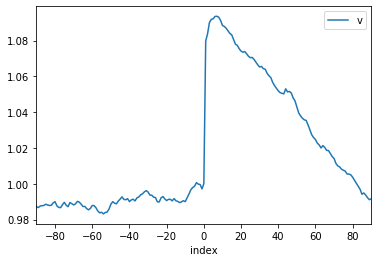

In [42]:
pAb = ["P"  +'Ab' +  'Ret_'+ str(i+1)  for i in range(90) ]
Ab = ['Ab' + 'Ret_'+ str(i+1)  for i in range(90) ]
t1 = Data[Data.EPeriod == 0][pAb].mean().to_frame().rename(index=lambda s: -1 * int(s[7::]) )
t2 = Data[Data.EPeriod == 0][Ab].mean().to_frame().rename(index=lambda s: int(s[6::]) )
t2 = t2.append(pd.DataFrame([0], columns=[0]))
t = t1.append(t2).sort_index()
t['v'] = 1
t.loc[t.index>0,'v'] = (1+t.loc[t.index>0][0]/100)
t.loc[t.index<0,'v'] = 1 /(1+t.loc[t.index<0][0]/100)
t = t.reset_index()
t.plot(y = 'v', x='index')
AbRet =  t[['v','index']].rename(columns = {'v':'AbReturn'})

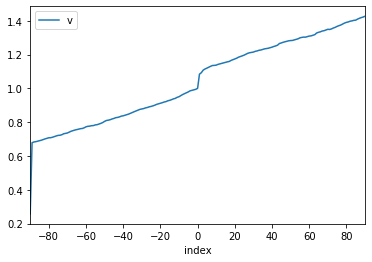

In [43]:
pAb = ["P"  +  'Ret_'+ str(i+1)  for i in range(90) ]
Ab = [ 'Ret_'+ str(i+1)  for i in range(90) ]
t1 = Data[Data.EPeriod == 0][pAb].mean().to_frame().rename(index=lambda s: -1 * int(s[5::]) )
t2 = Data[Data.EPeriod == 0][Ab].mean().to_frame().rename(index=lambda s: int(s[4::]) )
t2 = t2.append(pd.DataFrame([0], columns=[0]))
t = t1.append(t2).sort_index()
t['v'] = 1
t.loc[t.index>0,'v'] = (1+t.loc[t.index>0][0]/100)
t.loc[t.index<0,'v'] = 1 /(1+t.loc[t.index<0][0]/100)
t = t.reset_index()
t.plot(y = 'v', x='index')
Ret =  t[['v','index']].rename(columns = {'v':'Return'})

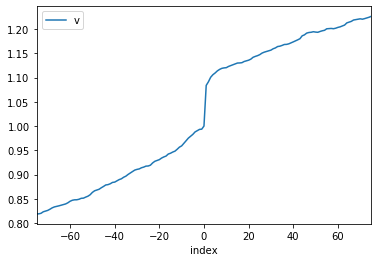

In [44]:
pAb = ["P"  +'E' +  'Ret_'+ str(i+1)  for i in range(75) ]
Ab = ['E' + 'Ret_'+ str(i+1)  for i in range(75) ]
t1 = Data[Data.EPeriod == 0][pAb].mean().to_frame().rename(index=lambda s: -1 * int(s[6::]) )
t2 = Data[Data.EPeriod == 0][Ab].mean().to_frame().rename(index=lambda s: int(s[5::]) )
t2 = t2.append(pd.DataFrame([0], columns=[0]))
t = t1.append(t2).sort_index()
t['v'] = 1
t.loc[t.index>0,'v'] = (1+t.loc[t.index>0][0]/100)
t.loc[t.index<0,'v'] = 1 /(1+t.loc[t.index<0][0]/100)
t = t.reset_index()
t.plot(y = 'v', x='index')
ERet = t[['v','index']].rename(columns = {'v':'EReturn'})